![](ITD.png)

<div style = " Text-align: center">
    
# Inteligencia Artificial

##  Laboratorio 2: COVID-19-MX (Arboles de Decision)

### Nombre Del Docente
## Rodriguez Rivas Jose Gabriel
### Nombre Del Alumno
## Edgar Miguel Soto Trujillo

</div>

In [48]:
import pandas as pd
Cvirus= pd.read_csv("200723COVID19MEXICO.csv", encoding= 'unicode_escape')

In [49]:
Cvirus

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-07-23,1162e9,2,4,9,2,20,9,2,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
1,2020-07-23,0e50ac,2,4,9,2,9,9,5,2,...,2,1,2,2,99,1,99,MÃ©xico,99,2
2,2020-07-23,1dd91c,2,4,8,1,8,8,37,2,...,2,1,2,2,99,1,99,MÃ©xico,99,2
3,2020-07-23,1ad302,2,4,30,1,30,30,44,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
4,2020-07-23,1dd6f1,2,3,15,2,15,15,106,2,...,2,2,2,2,1,1,99,MÃ©xico,99,2
5,2020-07-23,117954,2,3,15,1,15,15,54,1,...,2,2,2,2,1,1,99,MÃ©xico,99,97
6,2020-07-23,02b80a,2,3,15,2,15,15,106,1,...,2,2,2,2,2,1,99,MÃ©xico,99,97
7,2020-07-23,1385b9,2,4,20,1,20,20,174,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
8,2020-07-23,1020c0,2,4,14,2,14,14,39,2,...,2,2,2,2,99,1,99,MÃ©xico,99,2
9,2020-07-23,0fb61f,2,4,31,2,31,31,50,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97


In [50]:
Cvirus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879608 entries, 0 to 879607
Data columns (total 35 columns):
FECHA_ACTUALIZACION    879608 non-null object
ID_REGISTRO            879608 non-null object
ORIGEN                 879608 non-null int64
SECTOR                 879608 non-null int64
ENTIDAD_UM             879608 non-null int64
SEXO                   879608 non-null int64
ENTIDAD_NAC            879608 non-null int64
ENTIDAD_RES            879608 non-null int64
MUNICIPIO_RES          879608 non-null int64
TIPO_PACIENTE          879608 non-null int64
FECHA_INGRESO          879608 non-null object
FECHA_SINTOMAS         879608 non-null object
FECHA_DEF              879608 non-null object
INTUBADO               879608 non-null int64
NEUMONIA               879608 non-null int64
EDAD                   879608 non-null int64
NACIONALIDAD           879608 non-null int64
EMBARAZO               879608 non-null int64
HABLA_LENGUA_INDIG     879608 non-null int64
DIABETES               879608

In [51]:
Cvirus['VIVIO'] = Cvirus['FECHA_DEF'].apply(lambda toLabel: 0 if toLabel =='9999-99-99' else 1)

In [52]:
y_target = Cvirus["VIVIO"].values

In [53]:
Cvirus.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,VIVIO
0,2020-07-23,1162e9,2,4,9,2,20,9,2,1,...,2,2,2,99,1,99,MÃ©xico,99,97,0
1,2020-07-23,0e50ac,2,4,9,2,9,9,5,2,...,1,2,2,99,1,99,MÃ©xico,99,2,0
2,2020-07-23,1dd91c,2,4,8,1,8,8,37,2,...,1,2,2,99,1,99,MÃ©xico,99,2,1
3,2020-07-23,1ad302,2,4,30,1,30,30,44,1,...,2,2,2,99,1,99,MÃ©xico,99,97,0
4,2020-07-23,1dd6f1,2,3,15,2,15,15,106,2,...,2,2,2,1,1,99,MÃ©xico,99,2,0


In [54]:
columns = ["ORIGEN","EDAD", "SEXO", "INTUBADO" ,"NEUMONIA", "DIABETES","EPOC","ASMA","INMUSUPR","HIPERTENSION","CARDIOVASCULAR",
           "OBESIDAD","RENAL_CRONICA","TABAQUISMO"]

X_input = Cvirus[list(columns)].values

In [55]:
from sklearn import tree

clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)

clf_train = clf_train.fit(X_input, y_target)

In [56]:
clf_train.score(X_input,y_target)

0.9432883739120154

In [57]:
clasificacion=['No vive', 'Si vive']

In [58]:
import sklearn
#from sklearn.externals.six import StringIO
with open("Cvirus.dot", 'w') as f:
  f = tree.export_graphviz(clf_train, out_file=f, feature_names=columns, class_names=clasificacion)

In [59]:
!dot -Tpng Cvirus.dot -o Cvirus.png

### Mapa Conceptual Arbol de Decicion

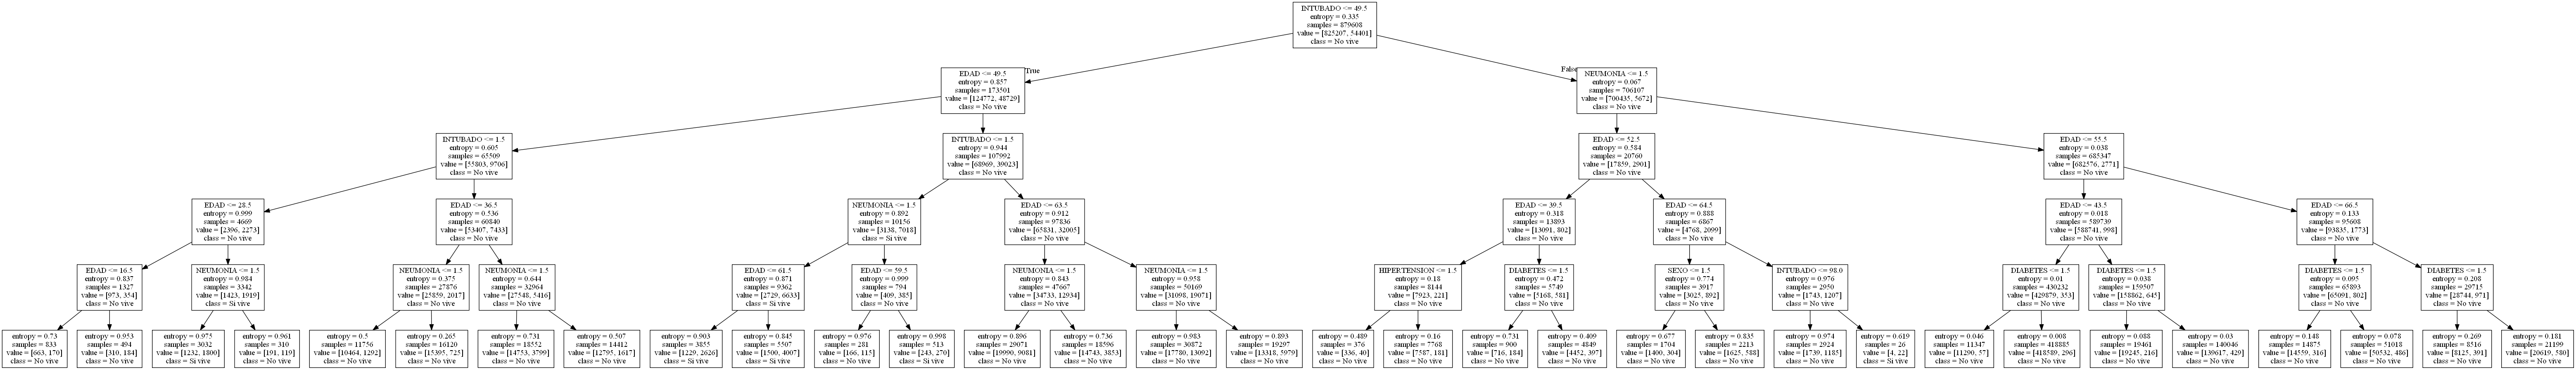

In [60]:
from IPython.display import Image

##m 
Image("Cvirus.png")

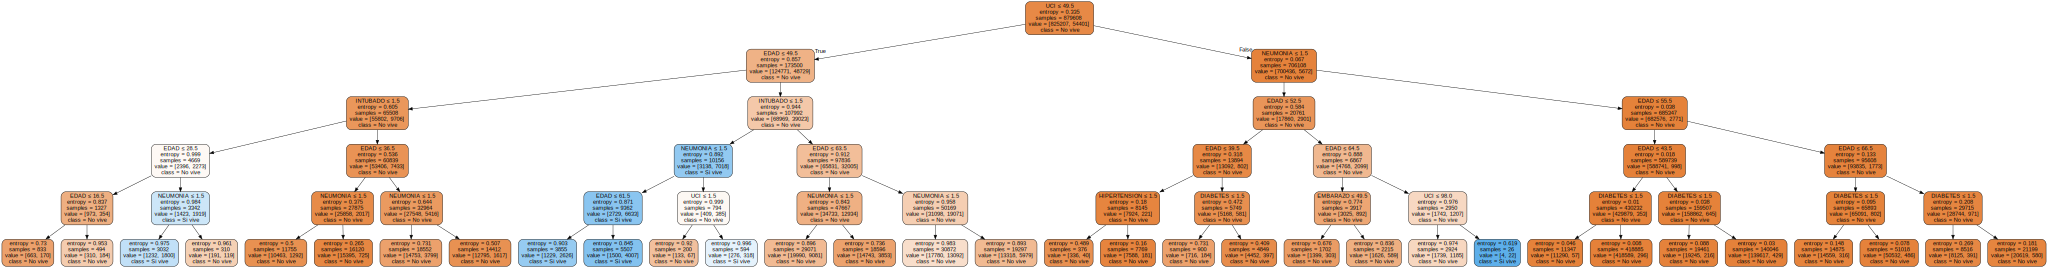

In [47]:
import graphviz
dot_data = tree.export_graphviz(clf_train, out_file=None,   
                         class_names=clasificacion,
                         feature_names=columns,
                         filled=True, rounded=True,
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("CovidColor", format='png')
graph

In [25]:
y_target = Cvirus["VIVIO"].values

In [61]:
columns = ["ORIGEN","SEXO", "EDAD", "DIABETES","EPOC","ASMA","INMUSUPR","HIPERTENSION","CARDIOVASCULAR",
           "OBESIDAD","RENAL_CRONICA","TABAQUISMO"]

X_input = Cvirus[list(columns)].values

In [62]:
from sklearn import tree

clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)

clf_train = clf_train.fit(X_input, y_target)

In [63]:
clf_train.score(X_input,y_target)

0.9381531318496421

In [64]:
clasificacion=['No vive', 'Si vive']

In [65]:
import sklearn
#from sklearn.externals.six import StringIO
with open("Cvirus2.dot", 'w') as f:
  f = tree.export_graphviz(clf_train, out_file=f, feature_names=columns, class_names=clasificacion)

In [66]:
!dot -Tpng Cvirus2.dot -o Cvirus2.png

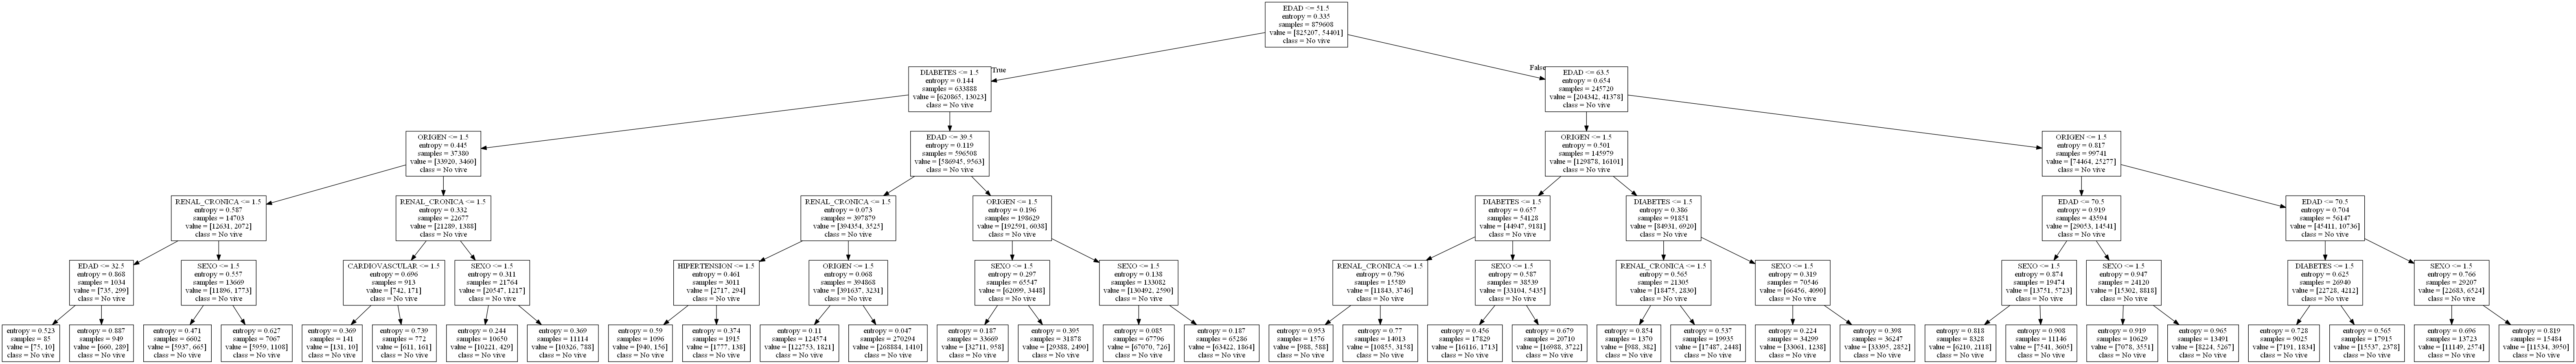

In [67]:
from IPython.display import Image

#display the decison tree graphic
Image("Cvirus2.png")

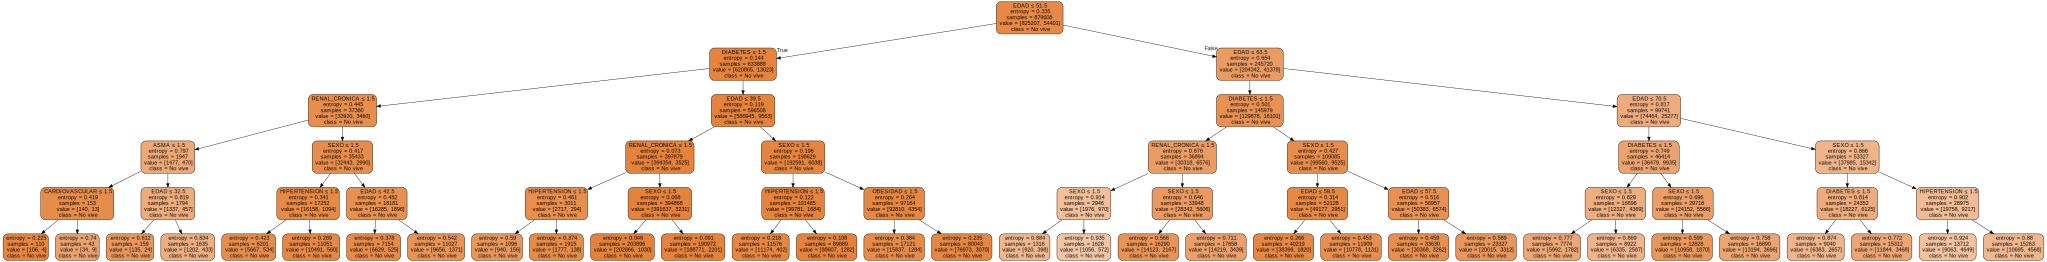

In [36]:
import graphviz
dot_data = tree.export_graphviz(clf_train, out_file=None,   
                         class_names=clasificacion,
                         feature_names=columns,
                         filled=True, rounded=True,
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("CovidColor2", format='png')
graph

## Conclusion 16040460

Para poder realisar este modelo del arbol de decisiones lo primero que tuve que hacer a los datos que nos proporciono el profesor.
Le  agrege una columna para tener el dato de si  esta con vida lo puse asi (Si vivio o No vivio)  al COVID 19 me base en una de las columna existente de FECHA_DEF que viene en el documento de exel, para mi necesitava identificar si con una variable que seria importante  Si vivio o no.
selecion una cantidad de datos para realisar mi mapa  con las lista de datos unas de las ramas son la edad y los demas  son factores como Neumonia e Intubado 


![](ITD.png)
<div style = " Text-align: center">
    

</div>
